# Introduction to Apache Spark

## *RDD: Resilient Distributed Datasets

- __Resilient__: withstand failures and complete an ongoing computation (fault tolerance).
- __Distributed__: spanning across multiple machines.
- __Datasets__: hold data.

RDD is a __read-only (immutable)__, partitioned collection of records
RDDs are made up of 4 parts:

- __Partitions__: Atomic pieces of the dataset. One or many per compute node.
- __Dependencies__: Models relationship between this RDD and its partitions with the RDD(s) it was derived from.
- A __function__ for computing the dataset based on its parent RDDs.
- __Metadata__ about it partitioning scheme and data placement.

## *Difference between Hadoop and Spark
Hadoop and Apache Spark are both big-data frameworks, but they don't really serve the same purposes.
### Hadoop:
- Hadoop is essentially a distributed data infrastructure: It distributes massive data collections across multiple nodes within a cluster of commodity servers, which means you don't need to buy and maintain expensive custom hardware.
- Hadoop has to read from and write to a disk.
- Hadoop written in __Java__.

### Spark:
- A data-processing tool that operates on those distributed data collections, it doesn't do distributed storage.
- Spark process data __in-memory database__.
- Spark written in __Scala__.
#### => Spark up to ~100 times faster
#### => Hadoop is able to work with larger datasets than Spark.

## *Transformations

- Transformation allow to create new RDDs from the existing RDDs (__not modified__ the existing RDD because __immutable__)
- New RDD may larger than old RDD (union, cartesian)
- New RDD may smaller than old RDD (filter, count, distinc, sample)
- New RDD may have a same size with old RDD (map, flatMap)
- Transformations are __lazy__, they get execute when we call an action. They are not executed immediately.

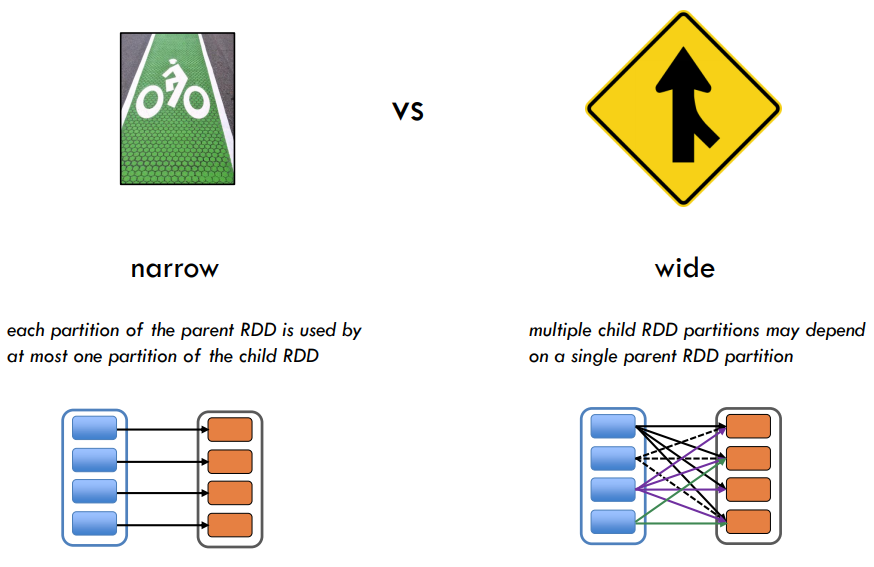

In [2]:
from pyspark import SparkContext

sc = SparkContext(appName="demo")

#### *Map
Return a new RDD by applying a function to each element of this RDD

In [3]:
x = sc.parallelize(['b', 'a', 'c'])
y = x.map(lambda z: (z, 1))

print(x.collect())
print(y.collect())

['b', 'a', 'c']
[('b', 1), ('a', 1), ('c', 1)]


#### *Filter
Return a new RDD containing only the elements that satisfy a predicate.

In [11]:
x = sc.parallelize([1, 2, 3])
y = x.filter(lambda x: x % 2 == 1) # keep old values

print(x.collect())
print(y.collect())

[1, 2, 3]
[1, 3]


#### *Flatmap
Return a new RDD by first applying a function to all elements of this RDD, an then flattening the results.

In [13]:
x = sc.parallelize([1, 2, 3])
y = x.flatMap(lambda x: (x, x*100, 42))
             
print(x.collect())
print(y.collect())

[1, 2, 3]
[1, 100, 42, 2, 200, 42, 3, 300, 42]


#### *Group by
Group data in the original RDD

In [14]:
x = sc.parallelize(['Duc', 'Khanh', 'Minh'])
y = x.groupBy(lambda x: x[0])

print([(k, list(v)) for (k, v) in y.collect()])

[('D', ['Duc']), ('K', ['Khanh']), ('M', ['Minh'])]


### *Keyed transformation

#### *Group By Key
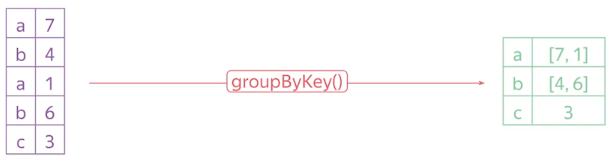

In [16]:
x = sc.parallelize([('B', 5), ('B', 4), ('A', 3), ('A', 2), ('A', 1)])
y = x.groupByKey()
             
print(x.collect())
print(list((j[0], list(j[1])) for j in y.collect()))

[('B', 5), ('B', 4), ('A', 3), ('A', 2), ('A', 1)]
[('A', [3, 2, 1]), ('B', [5, 4])]


#### *Reduce By Key
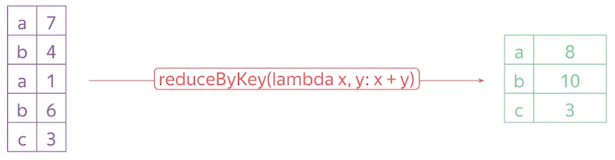

In [20]:
x = sc.parallelize([('B', 5), ('B', 4), ('A', 3), ('A', 2), ('A', 1)])
y = x.reduceByKey(lambda x, y: x + y)
             
print(x.collect())
print(y.collect())

[('B', 5), ('B', 4), ('A', 3), ('A', 2), ('A', 1)]
[('A', 6), ('B', 9)]


#### *Join
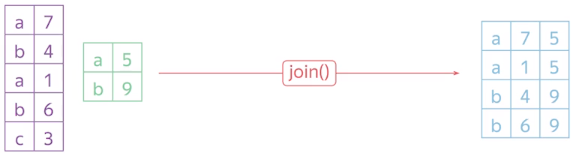

In [22]:
x = sc.parallelize([('a', 1), ('b', 2)])
y = sc.parallelize([('a', 3), ('a', 4), ('b', 5)])
z = x.join(y)

print(z.collect())

[('b', (2, 5)), ('a', (1, 3)), ('a', (1, 4))]


#### *Distinct

In [23]:
x = sc.parallelize([1,2,3,3,4])
y = x.distinct()

print(y.collect())

[1, 2, 3, 4]


## *Action
- Actions use to trigger computation and processing of the dataset
- Actions are executed on executors and they pass results back to the driver
- Actions are used to collect, save, print and fold data

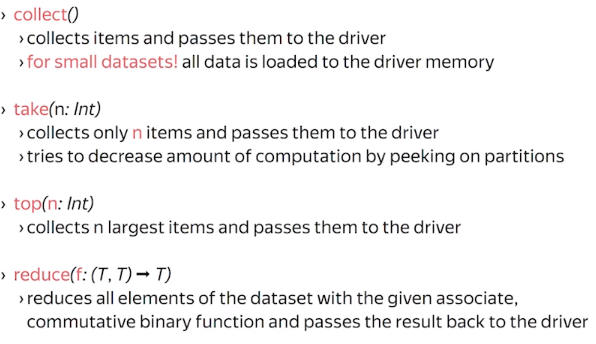

#### *Collect

In [39]:
x = sc.parallelize([1,2,3], 2)
y = x.collect()

print(y)

[1, 2, 3]


#### *Take

In [44]:
x = sc.parallelize([1,2,3,4])
y = x.reduce(lambda a, b: a + b)

print(x.collect())
print(y)

[1, 2, 3, 4]
10


#### *Mean

In [47]:
x = sc.parallelize([2, 4, 3])
y = x.mean()

print(x.collect())
print(y)

[2, 4, 3]
3.0


#### *Standard deviation

In [48]:
x = sc.parallelize([2, 4, 1])
y = x.stdev()

print(x.collect())
print(y)

[2, 4, 1]
1.247219128924647


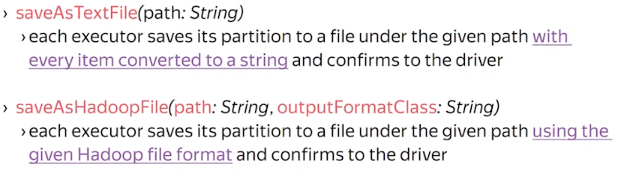

## *Spark execution and scheduling
- __Spark context__: for sets up internal services and establish connection to Spark execution environment.
- Can tracking __current status__ of Spark application like __configuration, app name__.

### Broadcast variable:
- Read-only shared variables with effective sharing mechanism.

### Accumulator variable:
- Read-write shared variables with restricted updates